In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Verileri inceleyin ve gerekli tüm verileri temizleyin.

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_new = df[["FullBath","CentralAir","Heating","YearBuilt","SaleCondition","YrSold","Street","PoolArea","SaleType","GarageCars","SalePrice"]] #I will contniue with light version of data set.
sorted_df = df_new.sort_values(by=["YrSold"],ascending=True,ignore_index=True)
sorted_df.head()

,FullBath,CentralAir,Heating,YearBuilt,SaleCondition,YrSold,Street,PoolArea,SaleType,GarageCars,SalePrice
0,2,Y,GasA,1992,Normal,2006,Pave,0,WD,2,175900
1,1,Y,GasA,1971,Abnorml,2006,Pave,0,WD,0,91500
2,2,Y,GasA,2006,Partial,2006,Pave,0,New,2,185000
3,1,Y,GasA,1979,Normal,2006,Pave,0,WD,2,135960
4,1,Y,GasA,1964,Abnorml,2006,Pave,0,WD,1,115000


In [5]:
df_new.isnull().sum()

FullBath         0
CentralAir       0
Heating          0
YearBuilt        0
SaleCondition    0
YrSold           0
Street           0
PoolArea         0
SaleType         0
GarageCars       0
SalePrice        0
dtype: int64

- Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.

In [6]:
columns = ["FullBath","CentralAir","Heating","YearBuilt","SaleCondition","YrSold","Street","PoolArea",
               "SaleType","GarageCars"]

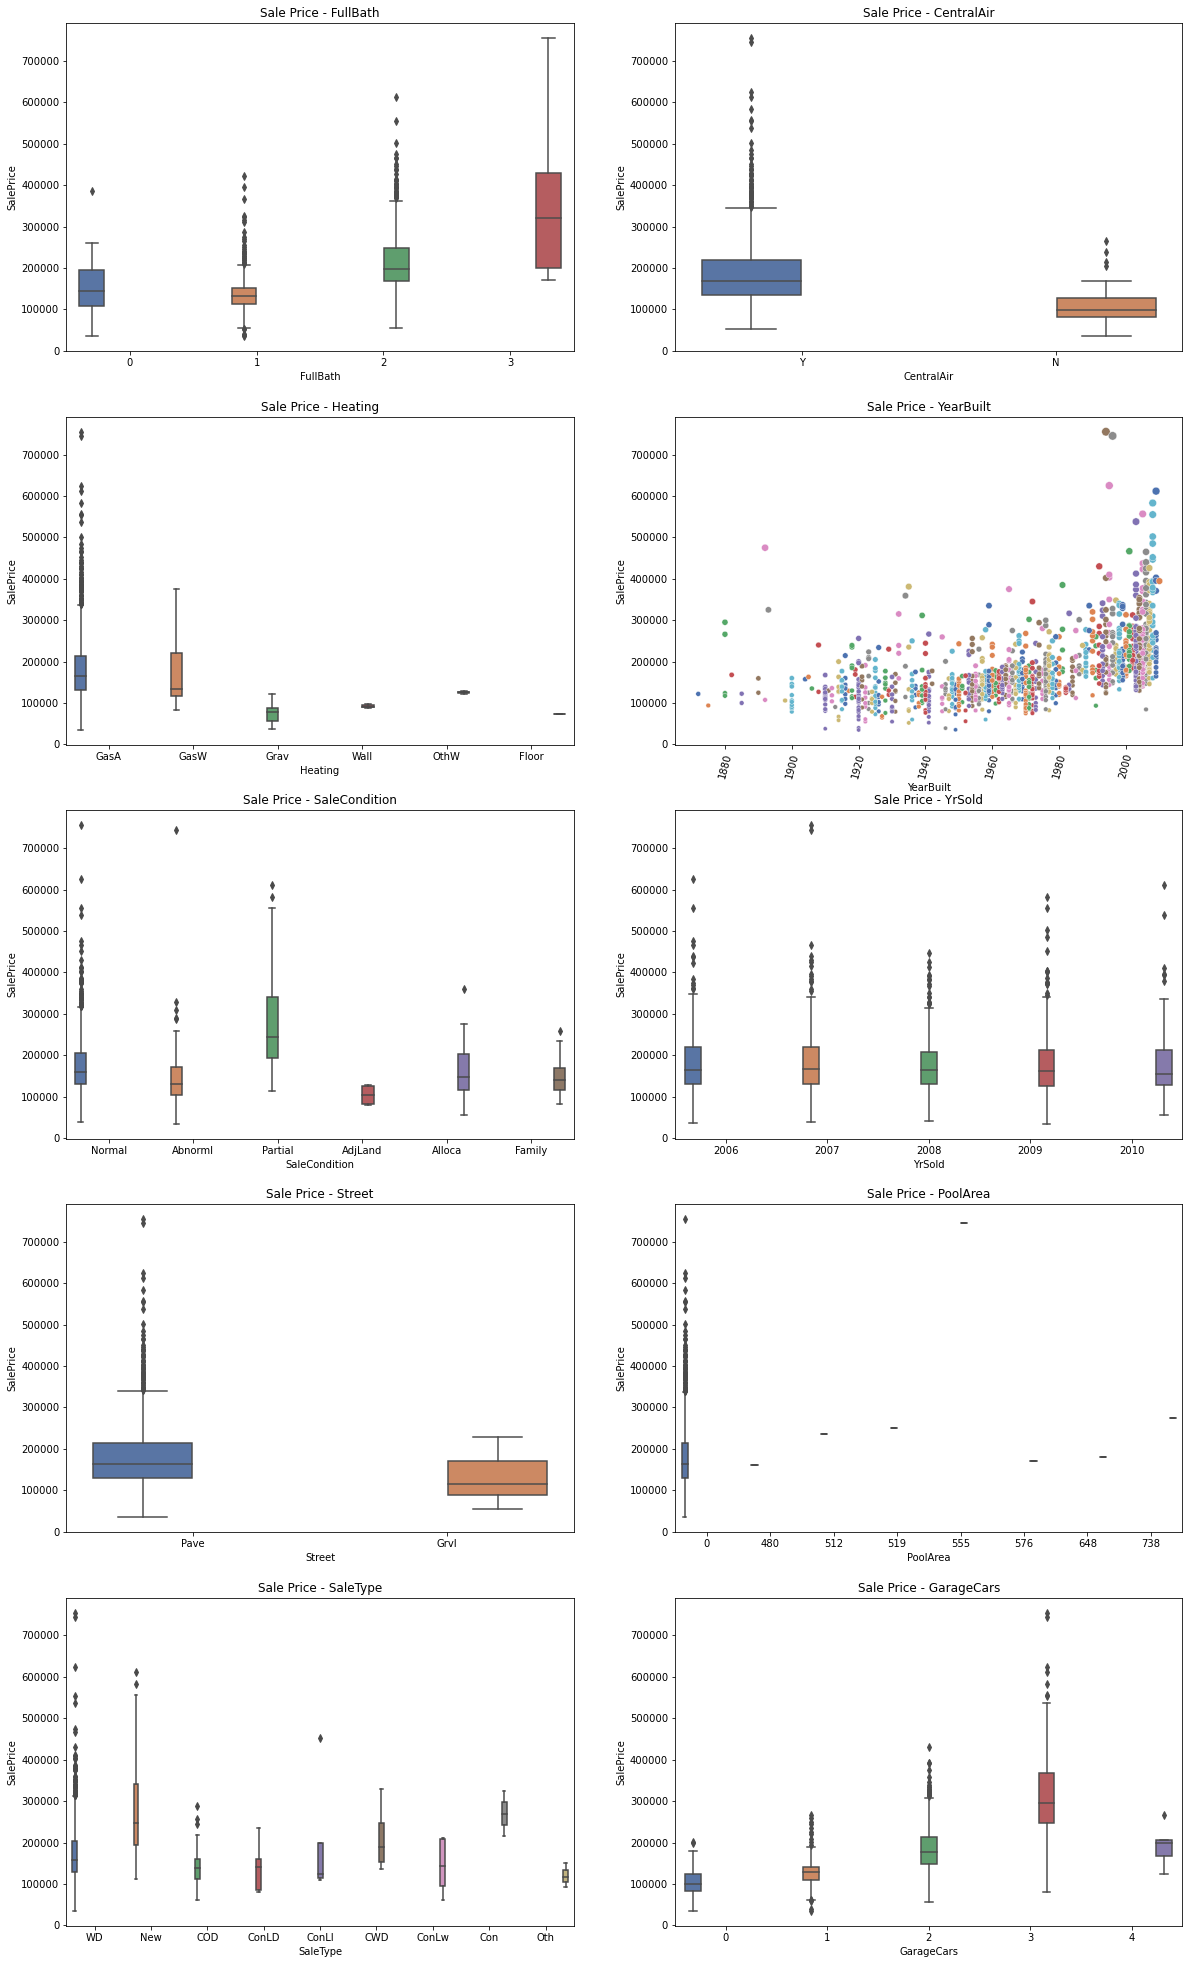

In [7]:
plt.figure(figsize=(20,35))
num = 1
for i in columns:
    if i == "YearBuilt":
        plt.subplot(5,2,num)
        plt.title("Sale Price - {}".format(i))
        sns.scatterplot(x=i,y="SalePrice",hue=i,size="SalePrice",data=sorted_df,palette="deep")
        plt.xticks(rotation="75")
        plt.legend().remove();
        num+=1
    else:
        plt.subplot(5,2,num)
        plt.title("Sale Price - {}".format(i))
        sns.boxplot(x=i,y="SalePrice",hue=i,data=df_new,palette="deep")
        plt.legend().remove();
        num+=1
    

When I examine the tables above, it seems that using the "Fullbath", "Street", "SaleType", "SaleCondition" variables will help us in our estimations. I will perform regression with these 4 variables.

Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

In [16]:
dummies = pd.get_dummies(df[["SaleType","Street"]],drop_first=True)
X = pd.concat([df_new["FullBath"],dummies],axis=1,ignore_index=False)
Y = df["SalePrice"]

In [17]:
lrm = LinearRegression()
lrm.fit(X, Y)

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     86.33
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          1.99e-139
Time:                        13:06:36   Log-Likelihood:                -18203.
No. Observations:                1460   AIC:                         3.643e+04
Df Residuals:                    1449   BIC:                         3.649e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.077e+04    2.8e+04      1.101      0.271   -2.41e+04    8.56e+04
FullBath        7.217e+04   3095.223     23.318      0.000    6.61e+04    7.82e+04
SaleType_CWD    4.103e+04    3.3e+04      1.243      0.214   -2.37e+04    1.06e+05
SaleType_Con    1.181e+05   4.56e+04      2.587      0.010    2.85e+04    2.08e+05
SaleType_ConLD -7347.2825   2.33e+04     -0.315      0.753   -5.31e+04    3.84e+04
SaleType_ConLI  4.165e+04   2.98e+04      1.396      0.163   -1.69e+04       1e+05
SaleType_ConLw  -608.9474   2.98e+04     -0.020      0.984   -5.91e+04    5.79e+04
SaleType_New    8.733e+04   1.13e+04      7.697      0.000    6.51e+04     1.1e+05
SaleType_Oth   -1.965e+04   3.77e+04     -0.521      0.602   -9.36e+04    5.43e+04
SaleType_WD     1.973e+04   9794.824      2.015      0.044     518.159    3.89e+04
Street_Pave      1.25e+04   2.61e+04      0.479      0.632   -3.86e+04    6.36e+04
==============================================================================
Omnibus:                      567.515   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3827.742
Skew:                           1.657   Prob(JB):                         0.00
Kurtosis:                      10.207   Cond. No.                         65.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When we examine the P values, we see that the "FullBath" variable is related to the target variable, while most of our dummy variables are meaningless. We can write our model mathematically with the coefficient values.